In [34]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

Consumer complaints are binned in one of five categories. Some complaints are mis-binned. The goal of the project was to improve to accuracy to the complaints-to-issue process, ensuring complaints are properly categorized at the highest rate possible.   

In [26]:
complaints = pd.read_csv('complaints.csv')

In [27]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [33]:
complaints['Issue'].value_counts()

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64

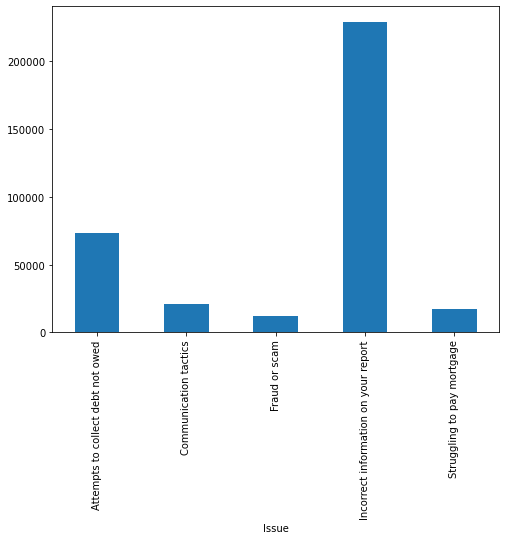

In [28]:
complaints = complaints.rename(columns = {'Consumer complaint narrative': 'Consumer_complaint_narrative'})
fig = plt.figure(figsize=(8,6))
complaints.groupby('Issue').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

                                      precision    recall  f1-score   support

   Attempts to collect debt not owed       0.78      0.71      0.74     14477
               Communication tactics       0.84      0.76      0.80      4160
                       Fraud or scam       0.92      0.90      0.91      2391
Incorrect information on your report       0.91      0.95      0.93     46122
          Struggling to pay mortgage       0.93      0.93      0.93      3537

                            accuracy                           0.89     70687
                           macro avg       0.88      0.85      0.86     70687
                        weighted avg       0.88      0.89      0.88     70687



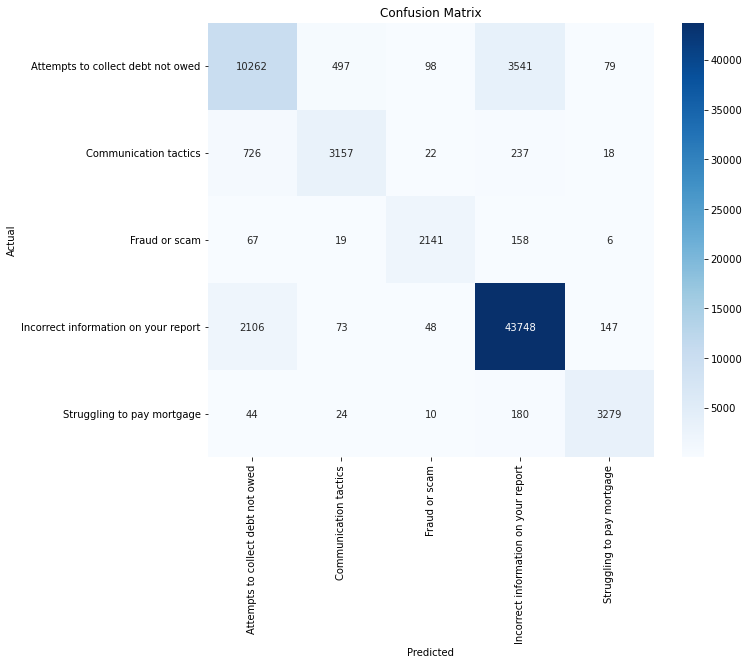

In [32]:
X_train, X_test, y_train, y_test = train_test_split(complaints['Consumer_complaint_narrative'], 
                                                    complaints['Issue'], 
                                                    test_size=0.2, 
                                                    random_state=42) 

vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LinearSVC()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Adjustments to the consumer complaint column proved to increased the models accuracy. 'X' variables were removed, all letters were made lowercase, and the n_gram range was set at 1,3 -- which proved to increase the accuracy above other n_gram ranges attemped.  

In [17]:
complaints['Consumer_complaint_narrative'] = complaints['Consumer_complaint_narrative'].str.lower()

In [18]:
complaints_no_x = complaints['Consumer_complaint_narrative']

complaints_no_x = complaints_no_x.str.replace('xx', '').to_frame()

In [19]:
complaints_no_x = pd.concat([complaints_no_x, complaints['Issue']], axis=1)

In [20]:
complaints_no_x['issue_id'] = complaints_no_x['Issue'].factorize()[0]

                                      precision    recall  f1-score   support

   Attempts to collect debt not owed       0.83      0.79      0.81     14477
               Communication tactics       0.87      0.80      0.84      4160
                       Fraud or scam       0.94      0.90      0.92      2391
Incorrect information on your report       0.94      0.96      0.95     46122
          Struggling to pay mortgage       0.94      0.94      0.94      3537

                            accuracy                           0.91     70687
                           macro avg       0.90      0.88      0.89     70687
                        weighted avg       0.91      0.91      0.91     70687



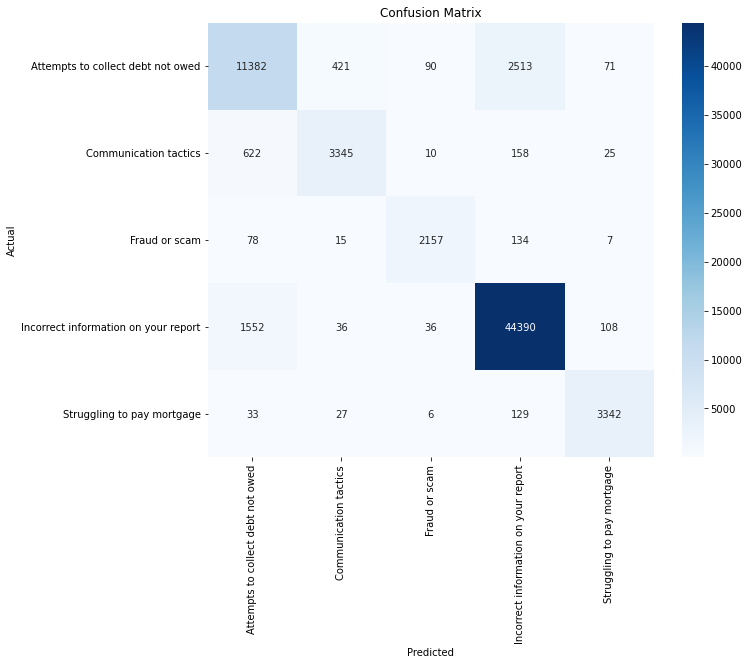

In [23]:
#removed x and lowercase/ min and max and n-gram (1,3)

X_train, X_test, y_train, y_test = train_test_split(complaints_no_x['Consumer_complaint_narrative'], 
                                                    complaints_no_x['Issue'], 
                                                    test_size=0.2, 
                                                    random_state=42) 

vectorizer = TfidfVectorizer(min_df = 1, max_df =.75, ngram_range = (1,3))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LinearSVC()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()